In [166]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from random import shuffle
import numpy as np
from numpy import sin, cos, pi
import tensorflow as tf
from matplotlib import pyplot as plt
from ipywidgets import interact, fixed
import IPython
import random

from scipy.io import wavfile

In [167]:
IN = 4
HIDDEN = 2
SAMPLE_RATE = 44100
DURATION = 1
OUT = SAMPLE_RATE*DURATION

In [168]:
def path(i):
    return "./rendered/clip-0{}.wav".format(i)

def readFile(i):
    sample_rate, data = wavfile.read(path(i))
    data_normalized = np.divide(data, 2.**14)
    
    return data_normalized, sample_rate

def vector(i):
    v = np.zeros(IN)
    v[i-1] = 1
    return np.asarray(v)

def dataPair(i):
    data, rate = readFile(i)
    return vector(i), data

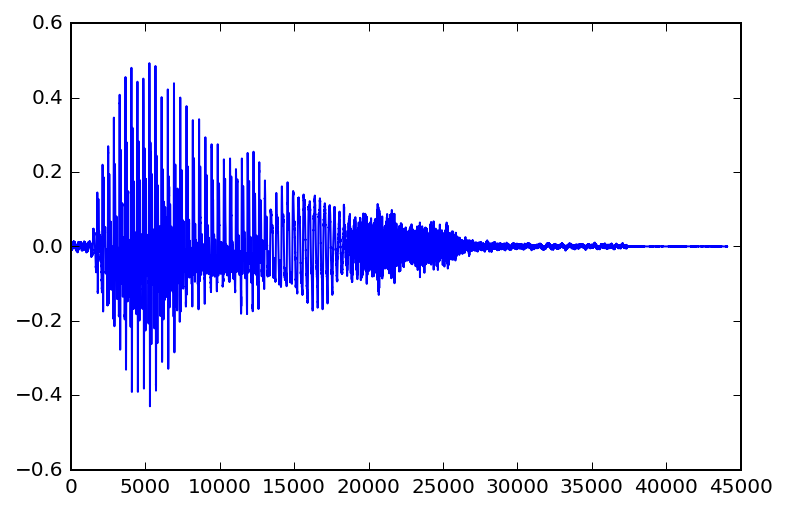

In [169]:
data, r = readFile(4)
plt.plot(data)
IPython.display.Audio(data, rate=r)

In [170]:
x = tf.placeholder('float', [None, IN])
targ = tf.placeholder('float', [None, OUT])

def unif(s):
    return tf.random_uniform(shape=s, minval=-.01, maxval=.01)
def a(x):
    return tf.tanh(x)

#layer
W1 = tf.Variable(unif([IN, HIDDEN]))
#b1 = tf.Variable(unif([HIDDEN]))

out1 = a(tf.matmul(x, W1))

#layer
W2 = tf.Variable(unif([HIDDEN, OUT]))
#b2 = tf.Variable(unif([OUT]))

y = tf.matmul(out1, W2)

sqr_error = tf.reduce_mean(tf.square(y - targ))
init = tf.initialize_all_variables()

In [171]:
sess = tf.Session()
sess.run(init)

In [230]:
ITERS = 50000
PROG = 10
LEARN_RATE = 1.0

train = tf.train.GradientDescentOptimizer(LEARN_RATE).minimize(sqr_error)

dataPairs = [dataPair(i+1) for i in xrange(IN)]

for i in xrange(ITERS):
    rand_pair = random.choice(dataPairs)
    sess.run(train, feed_dict={x: [rand_pair[0]], targ: [rand_pair[1]]})
    if i%int(ITERS / PROG) == 0:
        c = 0.0
        for n in xrange(IN):
            valid = dataPairs[n]
            c += sess.run(sqr_error, feed_dict={x: [valid[0]], targ: [valid[1]]})
        print 'cost', c

cost 0.00605061972601
cost 0.00604922096682
cost 0.00604795005347
cost 0.00604621190723
cost 0.00604463865602
cost 0.00604313196527
cost 0.00604197016219
cost 0.00604056556767
cost 0.00603935507024
cost 0.00603830211185


Target


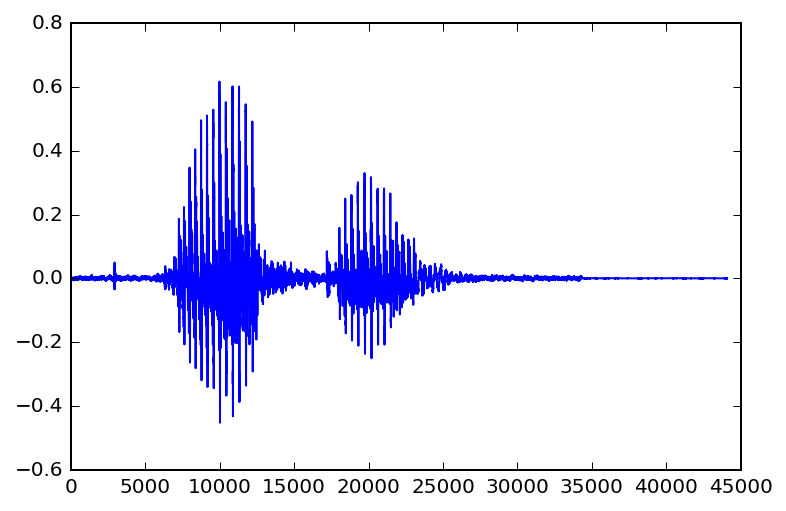

In [231]:
# Feed through a random i and see the audio output
test_word = 1
real_out, __ = readFile(test_word)

print 'Target'
plt.plot(real_out)
IPython.display.Audio(real_out, rate=SAMPLE_RATE)

Model output


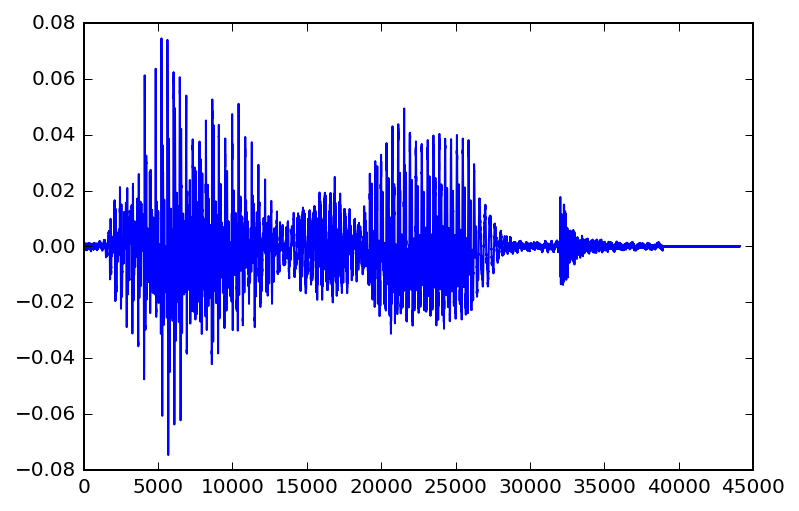

In [232]:
#plt.plot(model_out)
print 'Model output'

model_out = sess.run(y, feed_dict={x: [vector(test_word)]})[0]
plt.plot(model_out)
IPython.display.Audio(model_out, rate=SAMPLE_RATE)

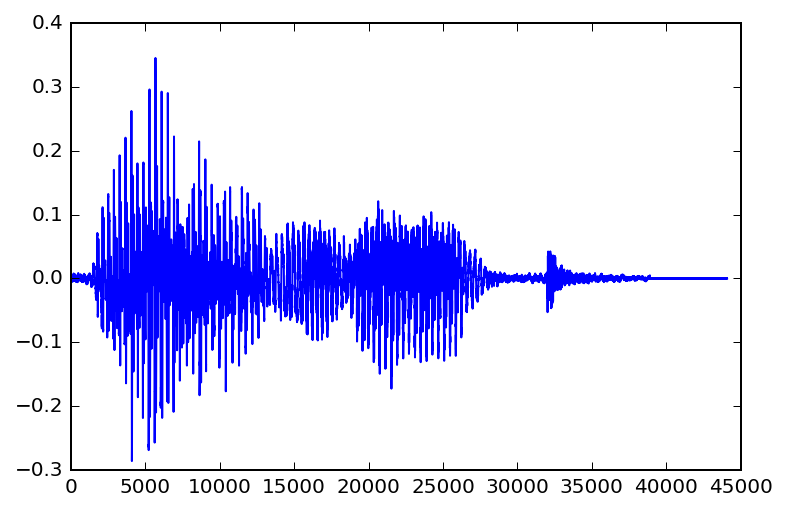

In [233]:
# Plot each row of learned weights
W2row = W2.eval(session=sess)[0,:]
plt.plot(W2row)
IPython.display.Audio(W2row, rate=SAMPLE_RATE)